# Reinforcement Learning - Assignment 2 - Jack Murray

Collaborated with classmate Arjun Venkatesh

### Setup Steps

#### Load Packages

In [1]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {"figure.figsize":(10, 6)})

#### Create a class representing the environment

In [2]:
class Segment: #(gym.Env):
    def __init__(self,numActions,startObservation,p,terminal,done):
        self.numActions = numActions
        self.observation = startObservation
        self.p = p
        self.terminal = terminal
        self.action_space = spaces.Discrete(self.numActions) # {0:left, 1:right}
        self.observation_space = spaces.Discrete(2*self.terminal+1)
        self.done = done
    def step(self,action):
        assert self.action_space.contains(action)
        assert self.observation_space.contains(self.observation)
        assert self.action_space.n == 2
        assert self.observation!=0
        assert self.observation!=(2*self.terminal)
        observation = self.observation
        done = self.done
        if action==0:
            observation_next = observation + np.random.choice([-1,1],p=[self.p,1-self.p])
        elif action==1:
            observation_next = observation + np.random.choice([-1,1],p=[1-self.p,self.p])
        if observation_next == (2*self.terminal):
            done = True
        elif observation_next == 0:
            done = True
        self.done = done
        self.observation = observation_next
        reward=self.rewards(observation,observation_next,action)
        return [self.observation,reward,done]
    def rewards(self,observation,observation_next,action):
        if observation_next==(2*self.terminal):
            reward = 1.0
        elif observation_next==0:
            reward = -1.0
        else:
            reward = -0.05
        return reward
    def reset(self):
        observation = self.startObservation
        self.observation = observation
        self.done = False
        return observation

## Part 1 - Always try to go Right

### Question 1

#### Create a Transition Probability Matrix

In the matrix below, each element represents the probability of transitioning from state i (row value) to state j (column value). We know from the problem setup that if the robot is at either terminal of the path (0 or 20), the episode ends and the robot doesn't make any more moves. For every other space, the robot has an 80% chance of moving right, and a 20% chance of moving left.

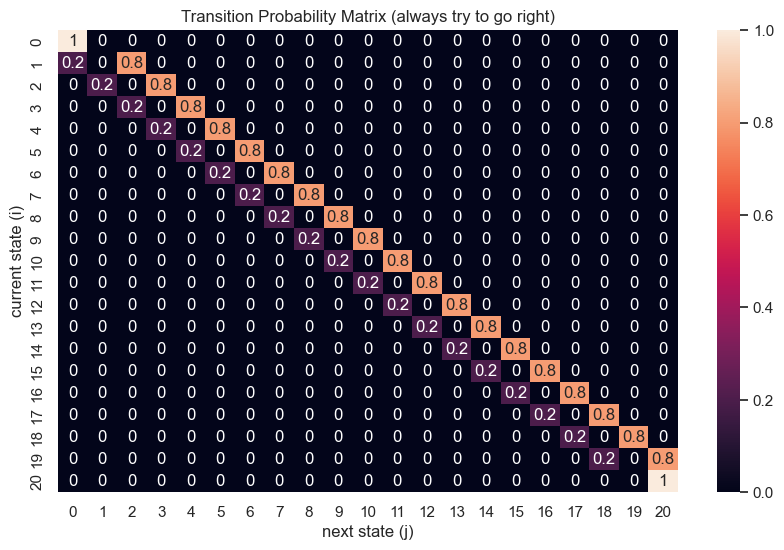

In [3]:
P = np.zeros((21, 21))
P = pd.DataFrame(P)

for s in range(21):
    if s == 0 or s == 20:
        P.iloc[s, s] = 1.0
    else:
        P.iloc[s, s+1] = 0.8 # 80% chance of moving right as intended
        P.iloc[s, s-1] = 0.2 # 20% chance of moving left
        
sns.set(rc = {"figure.figsize":(10, 6)})
mtx = sns.heatmap(P, annot = True)
mtx.set(xlabel = 'next state (j)',
        ylabel = 'current state (i)',
        title = 'Transition Probability Matrix (always try to go right)');

### Question 2

Group all states into classes. Report the classes and the total number of classes.

In [4]:
print('Classes are as follows:')
print('\n')

absorb_state_1 = {0}
print(absorb_state_1) # 0 is an absorbing state and thus forms its own class
print('\n')

transient_class = {num for num in range(1, 20)}
print(transient_class)
print('\n')

absorb_state_2 = {20}
print(absorb_state_2) # 20 is an absorbing state and thus forms its own class
print('\n')

# combine and count the classes
class_list = []
class_list.append(absorb_state_1)
class_list.append(transient_class)
class_list.append(absorb_state_2)

print('\n')
print('There are', len(class_list), 'classes')

Classes are as follows:


{0}


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


{20}




There are 3 classes


The two terminal states (0 and 20) form their own classes. State 0 can be accessed by state 1, but not the other way around, so these states do not communicate and therefore state 0 forms its own class. The same logic can be applied to states 19 and 20 - 20 can be accessed by 19, but not the other way around, so state 20 forms its own class.

Other than 0 and 20, all of the other states form a transient class, as the robot has a nonzero probability of passing through each of these states but it will never stay in any of these states forever. This logic forms the classes listed above.

In [5]:
# Tried to use Adam's code but wasn't working for me -- keeping it for later though

# def determine_classes(transitionMatrix, indexLabelMap):
#     assert(transitionMatrix.ndim == 2 and transitionMatrix.shape[0] == transitionMatrix.shape[1])
#     A = transitionMatrix.astype(bool)
#     B = A
#     for _ in range(transitionMatrix.shape[0]):
#         C = B + B.dot(A)
#         if np.array_equal(B, C):
#             break;
#         B = C
#     uss = list(range(transitionMatrix.shape[0]))
#     css = []
#     while (len(uss)):
#         s = uss[0]
#         j = np.argwhere(B[s, :] * B[:, s]).T[0]
#         j = j if len(j) else [s]
#         css.append([indexLabelMap[x] for x in j])
#         uss = np.setdiff1d(uss, j)
#     return css

### Question 3

#### Write the policy - always try to move right

In [6]:
def policy(observation):
    action = 1
    return action

#### Initiate values and create empty lists. Construct a loop to go through up to 100 steps (unless absorbing state is reached first). Plot the steps.

p = 0.8, meaning that the robot's action will result in moving right 80% of the time, and left the other 20% of the time

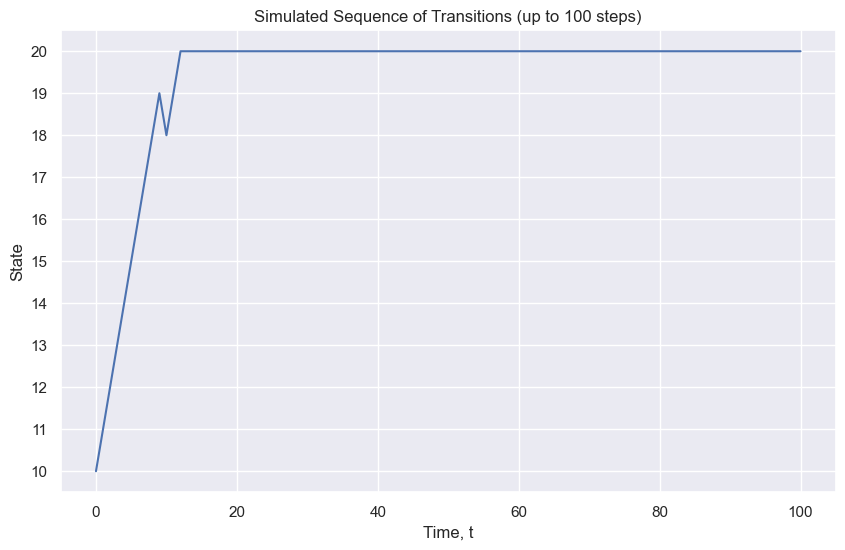

In [7]:
t=0
tMAX = 100 # representing a simulation of up to 100 steps
done = False
observations = [0] * 101
observation = 10
observations[0] = observation
rewards = []
actions = []
t_log = list(range(101))

env = Segment(numActions=2,startObservation=10,p=0.8,terminal=10,done=False)
while t <tMAX and done==False:
    action = policy(observation=observation)
    observation_next,reward,done = env.step(action=action)
    observations[t+1] = observation_next
    rewards.append(reward)
    actions.append(action)
    observation = observation_next
    t+=1

# after the episode is over, stay at the terminal state for the rest of the 100 steps (see loop below)
for i in range(t+1, 101): 
    observations[i] = observation

plt.plot(t_log, observations) # only plot the first 100 steps
plt.yticks(np.arange(np.min(observations), np.max(observations)+1, 1))
plt.xlabel('Time, t')
plt.ylabel('State')
plt.title('Simulated Sequence of Transitions (up to 100 steps)')
plt.show();

#### Report the likelihood of the first 100 steps.

The code below will compute the state probabilities for steps 1 through 100. We can use the method that we learned in class below:

$$
p(n) = p(0)\cdot P(n)p(n) = p\cdot P(n)
$$

In [8]:
Pmat = np.array(P, dtype = float)
p0 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.2, 0., 0.8, 0., 0., 0., 0., 0., 0., 0., 0., 0.]

T = 100 # we want to look at the first 100 steps
n = 21 # representing the 21 states in our environment
P_new = np.zeros((T,n,n),dtype=np.float64)
p1= np.zeros((T,1,n),dtype=np.float64)

P_new[0] = Pmat
p1[0] = p0

for t in range(1,T):
    # method 1: p(n) = p(0) * P(n)
    p1[t] = np.matmul(p0,P_new[t-1])
    # update n-step transition matrix
    P_new[t] = np.matmul(P_new[t-1],Pmat)

new_array = p1.reshape((100, 21))
df = pd.DataFrame(new_array)
df.index = list(range(1, 101))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print('Likelihood of each transition at each step (assuming we start at state 10):')
df

Likelihood of each transition at each step (assuming we start at state 10):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01,0.000000e+00,8.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-02,0.000000e+00,3.200000e-01,0.000000e+00,6.400000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e-03,0.000000e+00,9.600000e-02,0.000000e+00,3.840000e-01,0.000000e+00,5.120000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e-03,0.000000e+00,2.560000e-02,0.000000e+00,1.536000e-01,0.000000e+00,4.096000e-01,0.000000e+00,4.096000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e-04,0.000000e+00,6.400000e-03,0.000000e+00,5.120000e-02,0.000000e+00,2.048000e-01,0.000000e+00,4.096000e-01,0.000000e+00,3.276800e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.400000e-05,0.000000e+00,1.536000e-03,0.000000e+00,1.536000e-02,0.000000e+00,8.192000e-02,0.000000e+00,2.457600e-01,0.000000e+00,3.932160e-01,0.000000e+00,2.621440e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
7,0.000000e+00,0.000000e+00,0.000000e+00,1.280000e-05,0.000000e+00,3.584000e-04,0.000000e+00,4.300800e-03,0.000000e+00,2.867200e-02,0.000000e+00,1.146880e-01,0.000000e+00,2.752512e-01,0.000000e+00,3.670016e-01,0.000000e+00,2.097152e-01,0.000000e+00,0.000000e+00,0.000000
8,0.000000e+00,0.000000e+00,2.560000e-06,0.000000e+00,8.192000e-05,0.000000e+00,1.146880e-03,0.000000e+00,9.175040e-03,0.000000e+00,4.587520e-02,0.000000e+00,1.468006e-01,0.000000e+00,2.936013e-01,0.000000e+00,3.355443e-01,0.000000e+00,1.677722e-01,0.000000e+00,0.000000
9,0.000000e+00,5.120000e-07,0.000000e+00,1.843200e-05,0.000000e+00,2.949120e-04,0.000000e+00,2.752512e-03,0.000000e+00,1.651507e-02,0.000000e+00,6.606029e-02,0.000000e+00,1.761608e-01,0.000000e+00,3.019899e-01,0.000000e+00,3.019899e-01,0.000000e+00,1.342177e-01,0.000000
10,1.024000e-07,0.000000e+00,4.096000e-06,0.000000e+00,7.372800e-05,0.000000e+00,7.864320e-04,0.000000e+00,5.505024e-03,0.000000e+00,2.642412e-02,0.000000e+00,8.808038e-02,0.000000e+00,2.013266e-01,0.000000e+00,3.019899e-01,0.000000e+00,2.684355e-01,0.000000e+00,0.107374


#### We can also look at a heatmap to visualize the transition likelihoods at a higher level

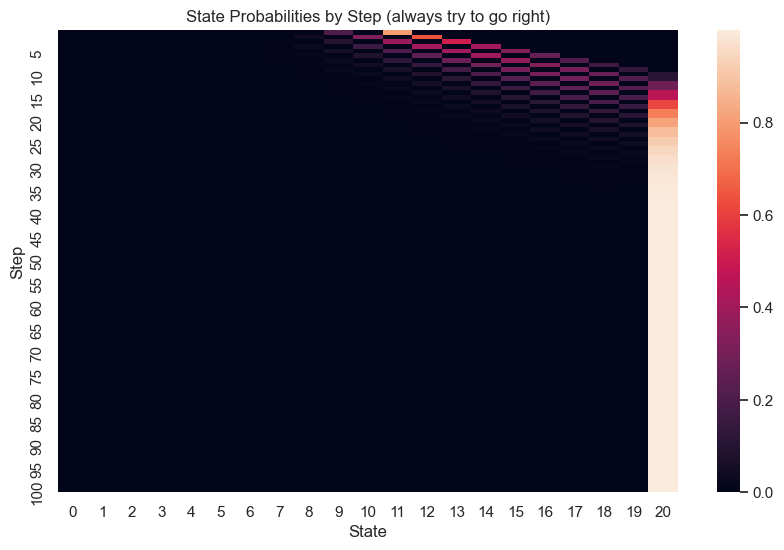

In [9]:
mtx = sns.heatmap(df, annot = False)
mtx.set(xlabel = 'State',
        ylabel = 'Step',
        yticks = list(range(5, 105, 5)),
        yticklabels = list(range(5, 105, 5)),
        title = 'State Probabilities by Step (always try to go right)',);

#### Report the likelihood of each transition from our simulation (using the likelihood of the first 100 steps as computed above)

This code block creates a new dataframe for the steps and observations from our simulation. It then uses the table above to look up the likelihood of each transition at its associated time/step.

In [10]:
likelihood_df_sim = pd.DataFrame({'t': t_log[1:], 'observation': observations[1:]}) # we can leave out the first observation since it will always be 10
likelihood_df_sim['likelihood'] = ''

for index, row in likelihood_df_sim.iterrows():
    # go look up the relevant values from the likelihood table that we created above (df)
    likelihood_df_sim.loc[index, 'likelihood'] = df.iloc[likelihood_df_sim.loc[index, 't']-1, likelihood_df_sim.loc[index, 'observation']]

likelihood_df_sim

,t,observation,likelihood
0,1,11,0.8
1,2,12,0.64
2,3,13,0.512
3,4,14,0.4096
4,5,15,0.32768
5,6,16,0.262144
6,7,17,0.209715
7,8,18,0.167772
8,9,19,0.134218
9,10,18,0.268435


#### Is this Markov chain stationary?

This Markov chain is stationary. We can tell this by looking at the n-step ahead probability plots below. For each possible transi remains constant as the number of transitions increases. In other words, the distribution of states does not depend on the initial state and only depends on the transition probabilities.

#### Is the Markov chain time homogenous?

This Markov chain is time homogenous. We can tell this because we know that the transition probability matrix is fixed, and doesn't change over time.

### Question 4

Compare the estimated (simulated) transition probabilities with the actual transition probabilities.

In [11]:
likelihood_df_actual = pd.DataFrame({'t': t_log[1:], 'observation': observations[1:]}) # we can leave out the first observation since it will always be 10
likelihood_df_actual['likelihood'] = ''
obs_prev = 10 # initialize as 10 since that's where the robot starts
likelihood_prev = 1.0 # initialize as 1.0 since the first likelihood will just be the probability of the first step itself

for index, row in likelihood_df_actual.iterrows():
    # go look up the relevant values from the actual transition probability matrix (P)
    likelihood_df_actual.loc[index, 'likelihood'] = P.iloc[obs_prev, row.observation] * likelihood_prev
    likelihood_prev = likelihood_df_actual.loc[index, 'likelihood']
    obs_prev = row.observation

#### Create a new combined table to compare the simulated and actual probabilities

In [12]:
likelihood_df_combined = pd.DataFrame({'t': t_log[1:],
                                       'observation': observations[1:],
                                       'likelihood_sim': likelihood_df_sim.likelihood,
                                       'likelihood_actual': likelihood_df_actual.likelihood})
likelihood_df_combined

,t,observation,likelihood_sim,likelihood_actual
0,1,11,0.8,0.8
1,2,12,0.64,0.64
2,3,13,0.512,0.512
3,4,14,0.4096,0.4096
4,5,15,0.32768,0.32768
5,6,16,0.262144,0.262144
6,7,17,0.209715,0.209715
7,8,18,0.167772,0.167772
8,9,19,0.134218,0.134218
9,10,18,0.268435,0.026844


### Question 5

Plot the n-step ahead probabilities for each transition for the first 100 steps.

In [13]:
T = 100 # we want to look at the first 100 steps
n = 21 # represents the 21 states in our environment
P_5 = np.zeros((T,n,n),dtype=np.float64)
Pmat = np.array(P, dtype=float) # P = the original transition probability matrix for this policy

P_5[0] = Pmat

for t in range(1,T):
    P_5[t] = np.matmul(P_5[t-1],Pmat)

P_5.shape

(100, 21, 21)

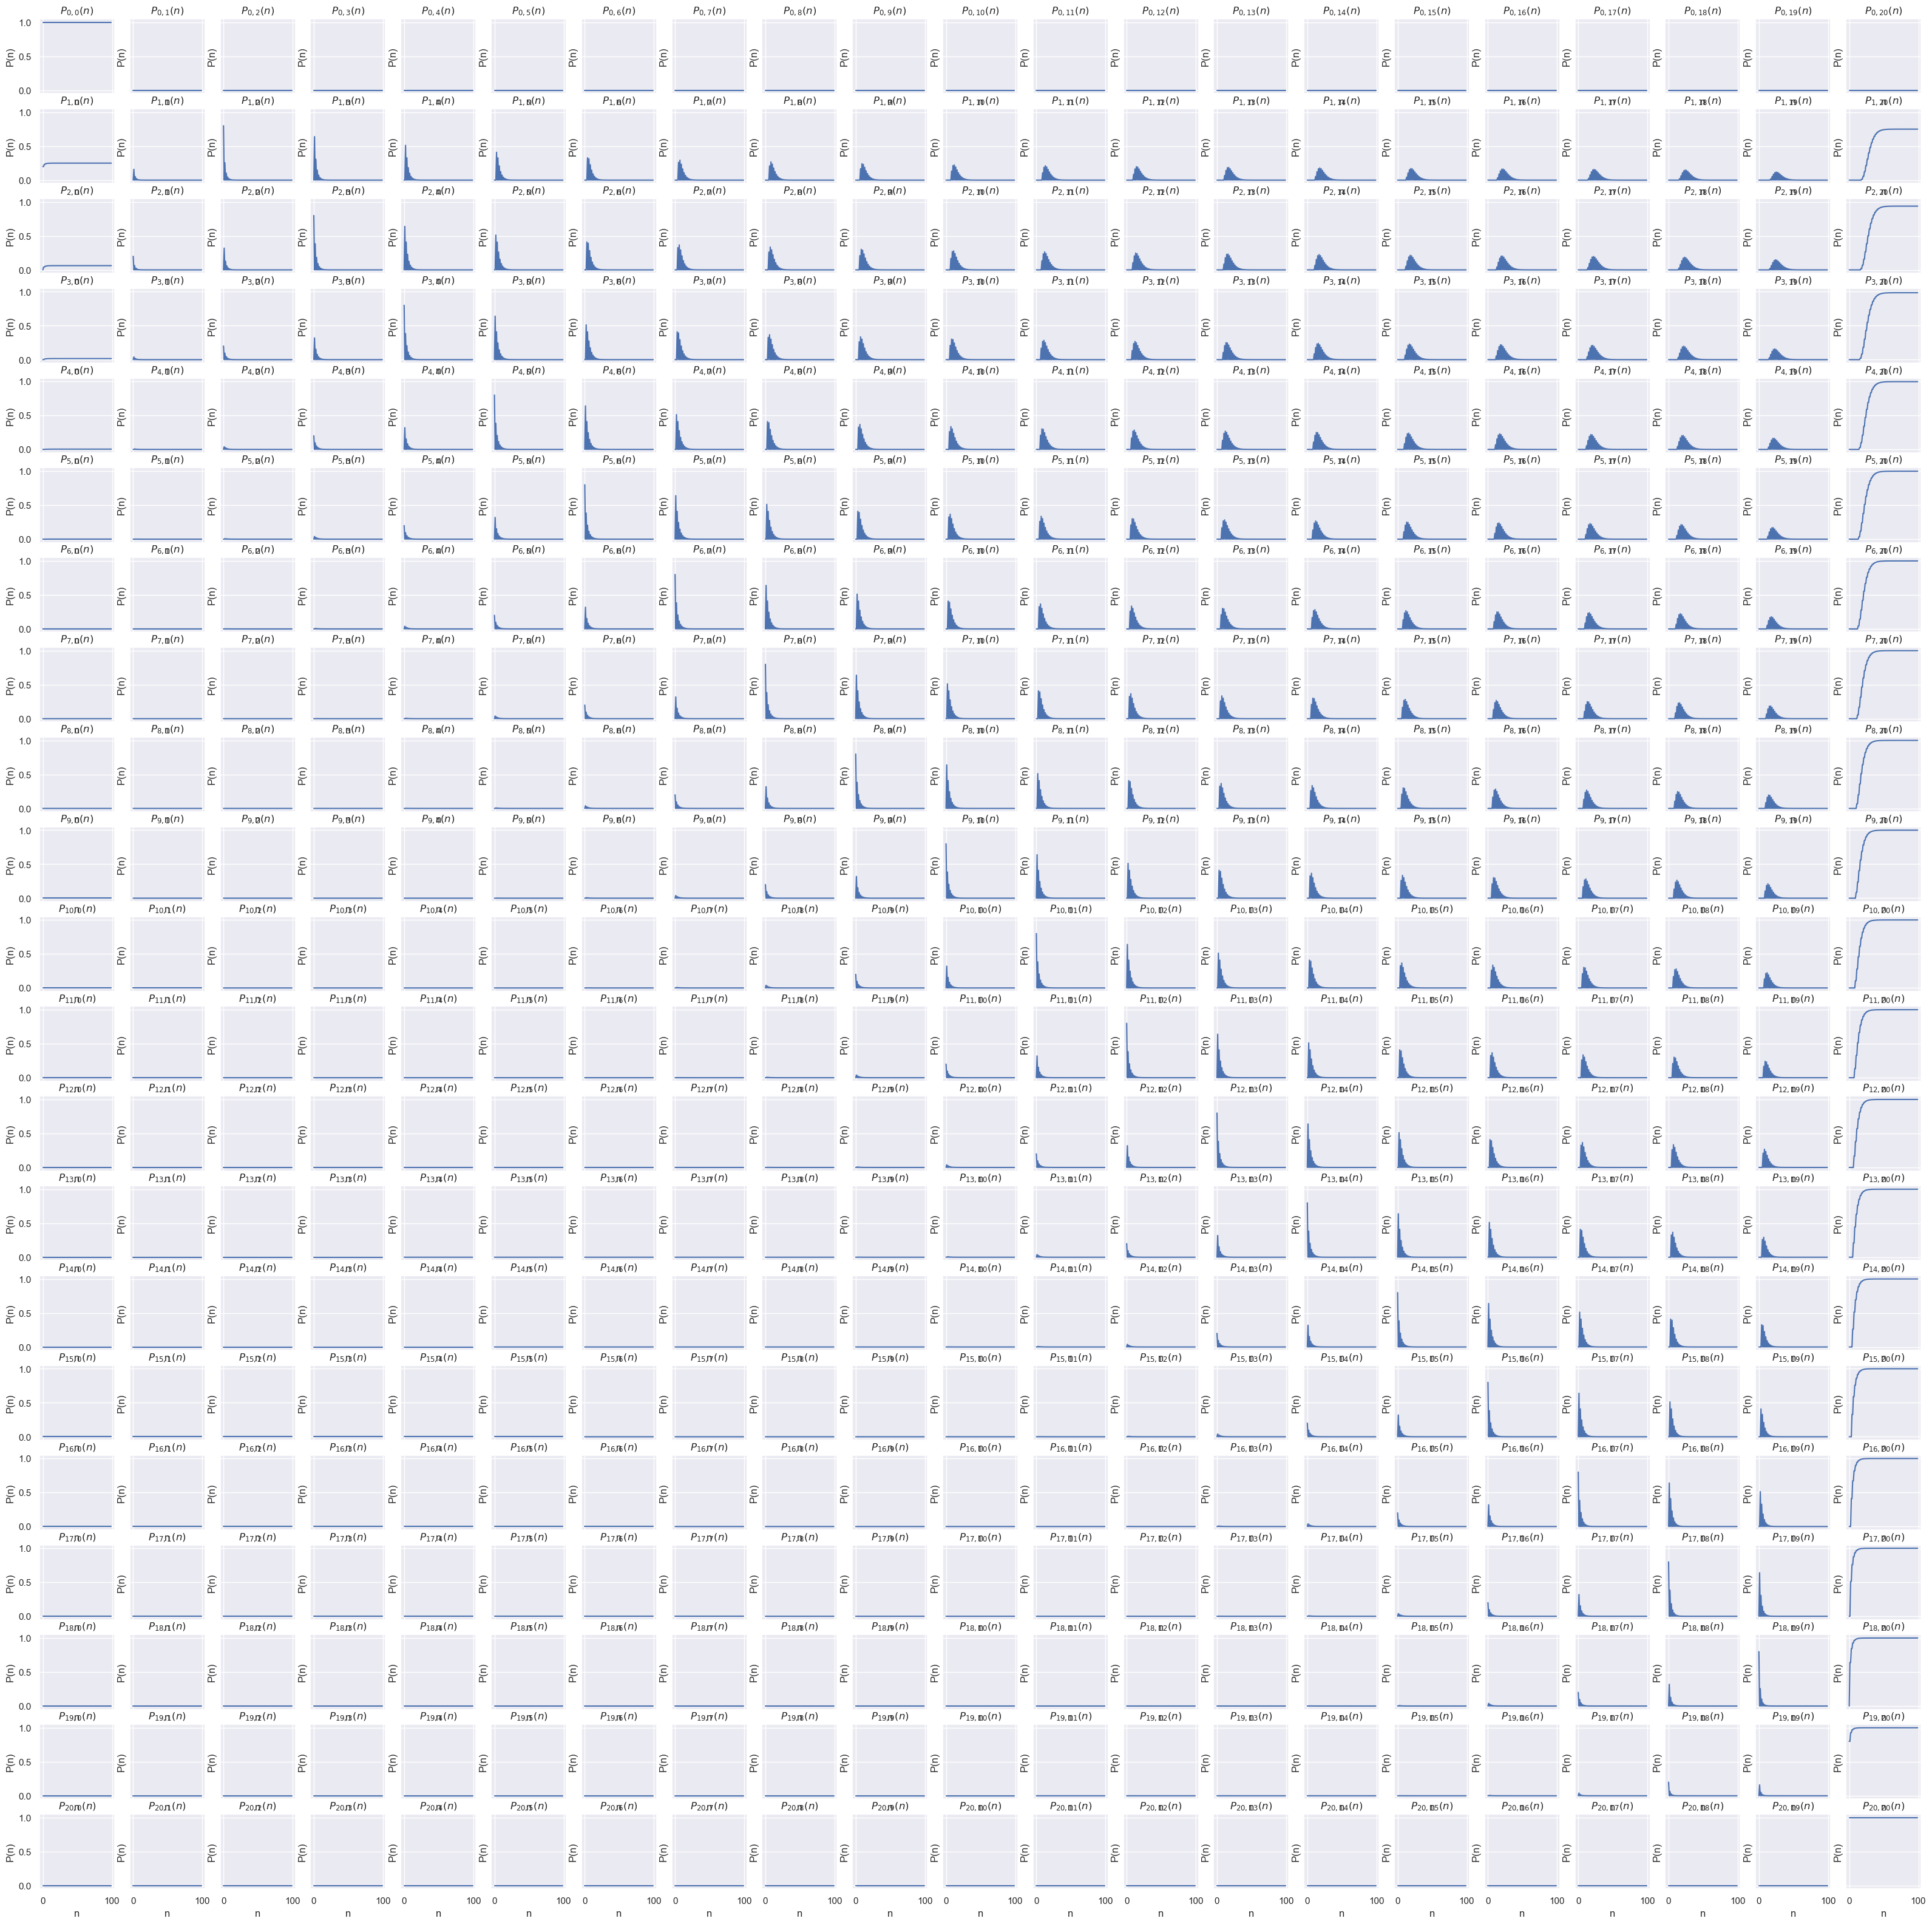

In [14]:
fig, ax = plt.subplots(21, 21, figsize = (40, 40), sharex = True, sharey = True)
for i in range(21):
    for j in range(21):
        ax[i, j].plot(P_5[:, i, j])
        ax[i, j].set_title(f"$P_{{{i}, {j}}}(n)$")
        ax[i, j].set_xlabel("n")
        ax[i, j].set_ylabel("P(n)")

## Part 2 - Always try to go Left

### Question 1

#### Create a Transition Probability Matrix

In the matrix below, each element represents the probability of transitioning from state i (row value) to state j (column value). We know from the problem setup that if the robot is at either terminal of the path (0 or 20), the episode ends and the robot doesn't make any more moves. For every other space, the robot has an 80% chance of moving left, and a 20% chance of moving right.

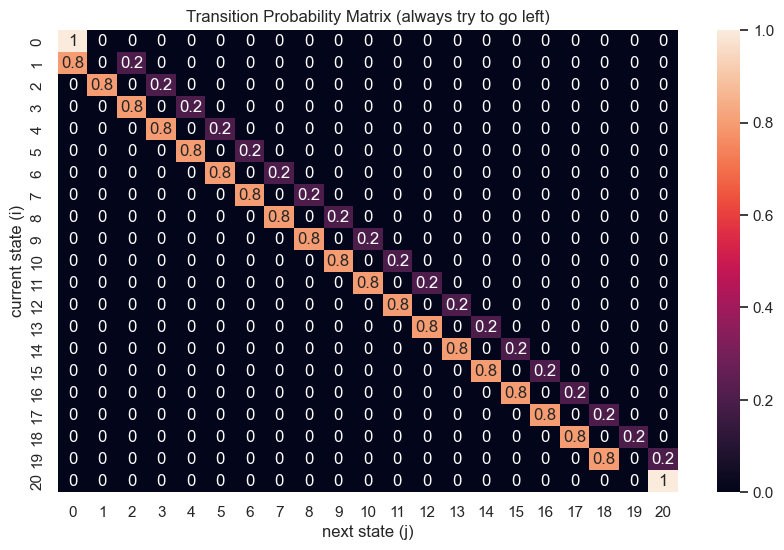

In [15]:
P = np.zeros((21, 21))
P = pd.DataFrame(P)

for s in range(21):
    if s == 0 or s == 20:
        P.iloc[s, s] = 1.0
    else:
        P.iloc[s, s+1] = 0.2 # 20% chance of moving right
        P.iloc[s, s-1] = 0.8 # 80% chance of moving left as intended
        
sns.set(rc = {"figure.figsize":(10, 6)})
mtx = sns.heatmap(P, annot = True)
mtx.set(xlabel = 'next state (j)',
        ylabel = 'current state (i)',
        title = 'Transition Probability Matrix (always try to go left)');

### Question 2

Group all states into classes. Report the classes and the total number of classes.

In [16]:
print('Classes are as follows:')
print('\n')

absorb_state_1 = {0}
print(absorb_state_1) # 0 is an absorbing state and thus forms its own class
print('\n')

transient_class = {num for num in range(1, 20)}
print(transient_class)
print('\n')

absorb_state_2 = {20}
print(absorb_state_2) # 20 is an absorbing state and thus forms its own class
print('\n')

# combine and count the classes
class_list = []
class_list.append(absorb_state_1)
class_list.append(transient_class)
class_list.append(absorb_state_2)

print('\n')
print('There are', len(class_list), 'classes')

Classes are as follows:


{0}


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


{20}




There are 3 classes


The two terminal states (0 and 20) form their own classes. State 0 can be accessed by state 1, but not the other way around, so these states do not communicate and therefore state 0 forms its own class. The same logic can be applied to states 19 and 20 - 20 can be accessed by 19, but not the other way around, so state 20 forms its own class.

Other than 0 and 20, all of the other states form a transient class, as the robot has a nonzero probability of passing through each of these states but it will never stay in any of these states forever. This logic forms the classes listed above.

### Question 3

#### Write the policy - always try to move right

In [17]:
def policy(observation):
    action = 1
    return action

#### Initiate values and create empty lists. Construct a loop to go through up to 100 steps (unless absorbing state is reached first). Plot the steps.

p = 0.2, meaning that the robot's action will result in moving left 80% of the time, and right the other 20% of the time

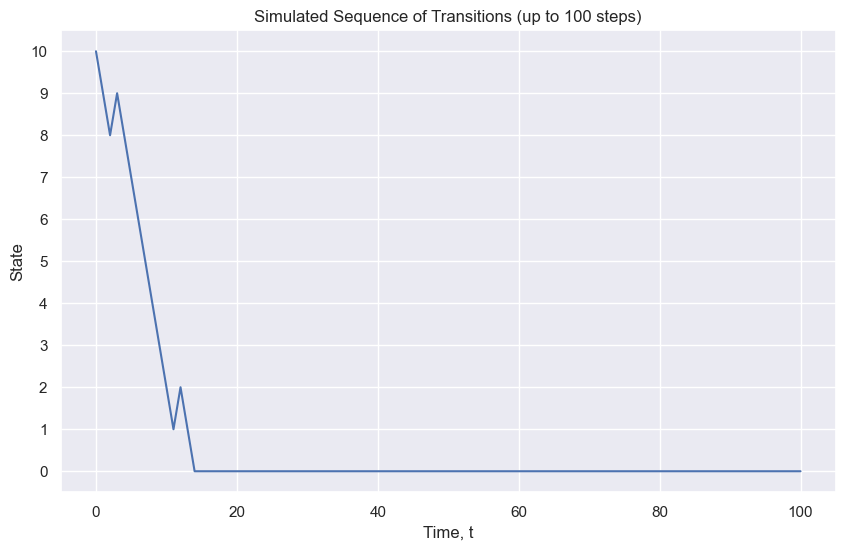

In [18]:
t=0
tMAX = 100 # representing a simulation of up to 100 steps
done = False
observations = [0] * 101
observation = 10
observations[0] = observation
rewards = []
actions = []
t_log = list(range(101))

env = Segment(numActions=2,startObservation=10,p=0.2,terminal=10,done=False)
while t <tMAX and done==False:
    action = policy(observation=observation)
    observation_next,reward,done = env.step(action=action)
    observations[t+1] = observation_next
    rewards.append(reward)
    actions.append(action)
    observation = observation_next
    t+=1

# after the episode is over, stay at the terminal state for the rest of the 100 steps (see loop below)
for i in range(t+1, 101): 
    observations[i] = observation

plt.plot(t_log, observations) # only plot the first 100 steps
plt.yticks(np.arange(np.min(observations), np.max(observations)+1, 1))
plt.xlabel('Time, t')
plt.ylabel('State')
plt.title('Simulated Sequence of Transitions (up to 100 steps)')
plt.show();

#### Report the likelihood of the first 100 steps.

The code below will compute the state probabilities for steps 1 through 100. We can use the method that we learned in class below:

$$
p(n) = p(0)\cdot P(n)p(n) = p\cdot P(n)
$$

In [19]:
Pmat = np.array(P, dtype = float)
p0 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.8, 0., 0.2, 0., 0., 0., 0., 0., 0., 0., 0., 0.]

T = 100 # we want to look at the first 100 steps
n = 21 # representing the 21 states in our environment
P_new = np.zeros((T,n,n),dtype=np.float64)
p1= np.zeros((T,1,n),dtype=np.float64)

P_new[0] = Pmat
p1[0] = p0

for t in range(1,T):
    # method 1: p(n) = p(0) * P(n)
    p1[t] = np.matmul(p0,P_new[t-1])
    # update n-step transition matrix
    P_new[t] = np.matmul(P_new[t-1],Pmat)

new_array = p1.reshape((100, 21))
df = pd.DataFrame(new_array)
df.index = list(range(1, 101))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print('Likelihood of each transition at each step (assuming we start at state 10):')
df

Likelihood of each transition at each step (assuming we start at state 10):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e-01,0.000000e+00,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.400000e-01,0.000000e+00,3.200000e-01,0.000000e+00,4.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.120000e-01,0.000000e+00,3.840000e-01,0.000000e+00,9.600000e-02,0.000000e+00,8.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.096000e-01,0.000000e+00,4.096000e-01,0.000000e+00,1.536000e-01,0.000000e+00,2.560000e-02,0.000000e+00,1.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.276800e-01,0.000000e+00,4.096000e-01,0.000000e+00,2.048000e-01,0.000000e+00,5.120000e-02,0.000000e+00,6.400000e-03,0.000000e+00,3.200000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.621440e-01,0.000000e+00,3.932160e-01,0.000000e+00,2.457600e-01,0.000000e+00,8.192000e-02,0.000000e+00,1.536000e-02,0.000000e+00,1.536000e-03,0.000000e+00,6.400000e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000,0.000000e+00,0.000000e+00,2.097152e-01,0.000000e+00,3.670016e-01,0.000000e+00,2.752512e-01,0.000000e+00,1.146880e-01,0.000000e+00,2.867200e-02,0.000000e+00,4.300800e-03,0.000000e+00,3.584000e-04,0.000000e+00,1.280000e-05,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000,0.000000e+00,1.677722e-01,0.000000e+00,3.355443e-01,0.000000e+00,2.936013e-01,0.000000e+00,1.468006e-01,0.000000e+00,4.587520e-02,0.000000e+00,9.175040e-03,0.000000e+00,1.146880e-03,0.000000e+00,8.192000e-05,0.000000e+00,2.560000e-06,0.000000e+00,0.000000e+00
9,0.000000,1.342177e-01,0.000000e+00,3.019899e-01,0.000000e+00,3.019899e-01,0.000000e+00,1.761608e-01,0.000000e+00,6.606029e-02,0.000000e+00,1.651507e-02,0.000000e+00,2.752512e-03,0.000000e+00,2.949120e-04,0.000000e+00,1.843200e-05,0.000000e+00,5.120000e-07,0.000000e+00
10,0.107374,0.000000e+00,2.684355e-01,0.000000e+00,3.019899e-01,0.000000e+00,2.013266e-01,0.000000e+00,8.808038e-02,0.000000e+00,2.642412e-02,0.000000e+00,5.505024e-03,0.000000e+00,7.864320e-04,0.000000e+00,7.372800e-05,0.000000e+00,4.096000e-06,0.000000e+00,1.024000e-07


#### We can also look at a heatmap to visualize the transition likelihoods at a higher level

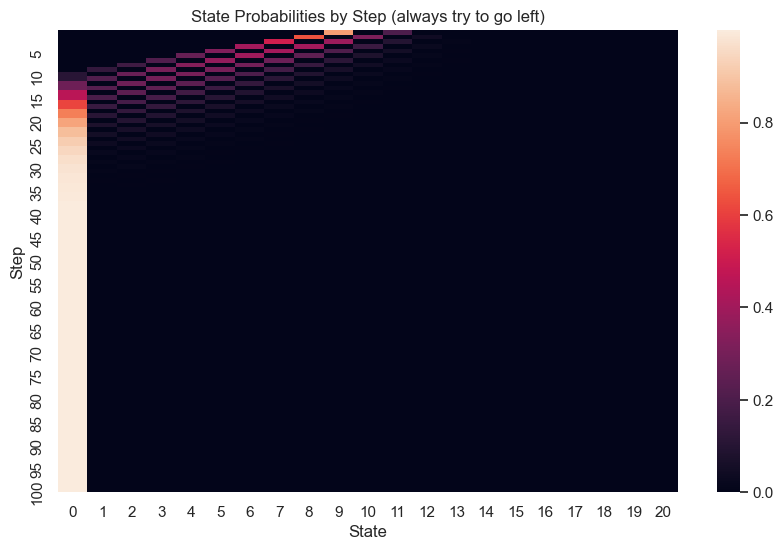

In [20]:
mtx = sns.heatmap(df, annot = False)
mtx.set(xlabel = 'State',
        ylabel = 'Step',
        yticks = list(range(5, 105, 5)),
        yticklabels = list(range(5, 105, 5)),
        title = 'State Probabilities by Step (always try to go left)',);

#### Report the likelihood of each transition from our simulation (using the likelihood of the first 100 steps as computed above)

This code block creates a new dataframe for the steps and observations from our simulation. It then uses the table above to look up the likelihood of each transition at its associated time/step.

In [21]:
likelihood_df_sim = pd.DataFrame({'t': t_log[1:], 'observation': observations[1:]}) # we can leave out the first observation since it will always be 10
likelihood_df_sim['likelihood'] = ''

for index, row in likelihood_df_sim.iterrows():
    # go look up the relevant values from the likelihood table that we created above (df)
    likelihood_df_sim.loc[index, 'likelihood'] = df.iloc[likelihood_df_sim.loc[index, 't']-1, likelihood_df_sim.loc[index, 'observation']]

likelihood_df_sim

,t,observation,likelihood
0,1,9,0.8
1,2,8,0.64
2,3,9,0.384
3,4,8,0.4096
4,5,7,0.4096
5,6,6,0.393216
6,7,5,0.367002
7,8,4,0.335544
8,9,3,0.30199
9,10,2,0.268435


#### Is this Markov chain stationary?

This Markov chain is stationary. We can tell this by looking at the n-step ahead probability plots below. For each possible transi remains constant as the number of transitions increases. In other words, the distribution of states does not depend on the initial state and only depends on the transition probabilities.

#### Is the Markov chain time homogenous?

This Markov chain is time homogenous. We can tell this because we know that the transition probability matrix is fixed, and doesn't change over time.

### Question 4

Compare the estimated (simulated) transition probabilities with the actual transition probabilities.

In [22]:
likelihood_df_actual = pd.DataFrame({'t': t_log[1:], 'observation': observations[1:]}) # we can leave out the first observation since it will always be 10
likelihood_df_actual['likelihood'] = ''
obs_prev = 10 # initialize as 10 since that's where the robot starts
likelihood_prev = 1.0 # initialize as 1.0 since the first likelihood will just be the probability of the first step itself

for index, row in likelihood_df_actual.iterrows():
    # go look up the relevant values from the actual transition probability matrix (P)
    likelihood_df_actual.loc[index, 'likelihood'] = P.iloc[obs_prev, row.observation] * likelihood_prev
    likelihood_prev = likelihood_df_actual.loc[index, 'likelihood']
    obs_prev = row.observation

#### Create a new combined table to compare the simulated and actual probabilities

In [23]:
likelihood_df_combined = pd.DataFrame({'t': t_log[1:],
                                       'observation': observations[1:],
                                       'likelihood_sim': likelihood_df_sim.likelihood,
                                       'likelihood_actual': likelihood_df_actual.likelihood})
likelihood_df_combined

,t,observation,likelihood_sim,likelihood_actual
0,1,9,0.8,0.8
1,2,8,0.64,0.64
2,3,9,0.384,0.128
3,4,8,0.4096,0.1024
4,5,7,0.4096,0.08192
5,6,6,0.393216,0.065536
6,7,5,0.367002,0.052429
7,8,4,0.335544,0.041943
8,9,3,0.30199,0.033554
9,10,2,0.268435,0.026844


### Question 5

Plot the n-step ahead probabilities for each transition for the first 100 steps.

In [24]:
T = 100 # we want to look at the first 100 steps
n = 21 # represents the 21 states in our environment
P_5 = np.zeros((T,n,n),dtype=np.float64)
Pmat = np.array(P, dtype=float) # P = the original transition probability matrix for this policy

P_5[0] = Pmat

for t in range(1,T):
    P_5[t] = np.matmul(P_5[t-1],Pmat)

P_5.shape

(100, 21, 21)

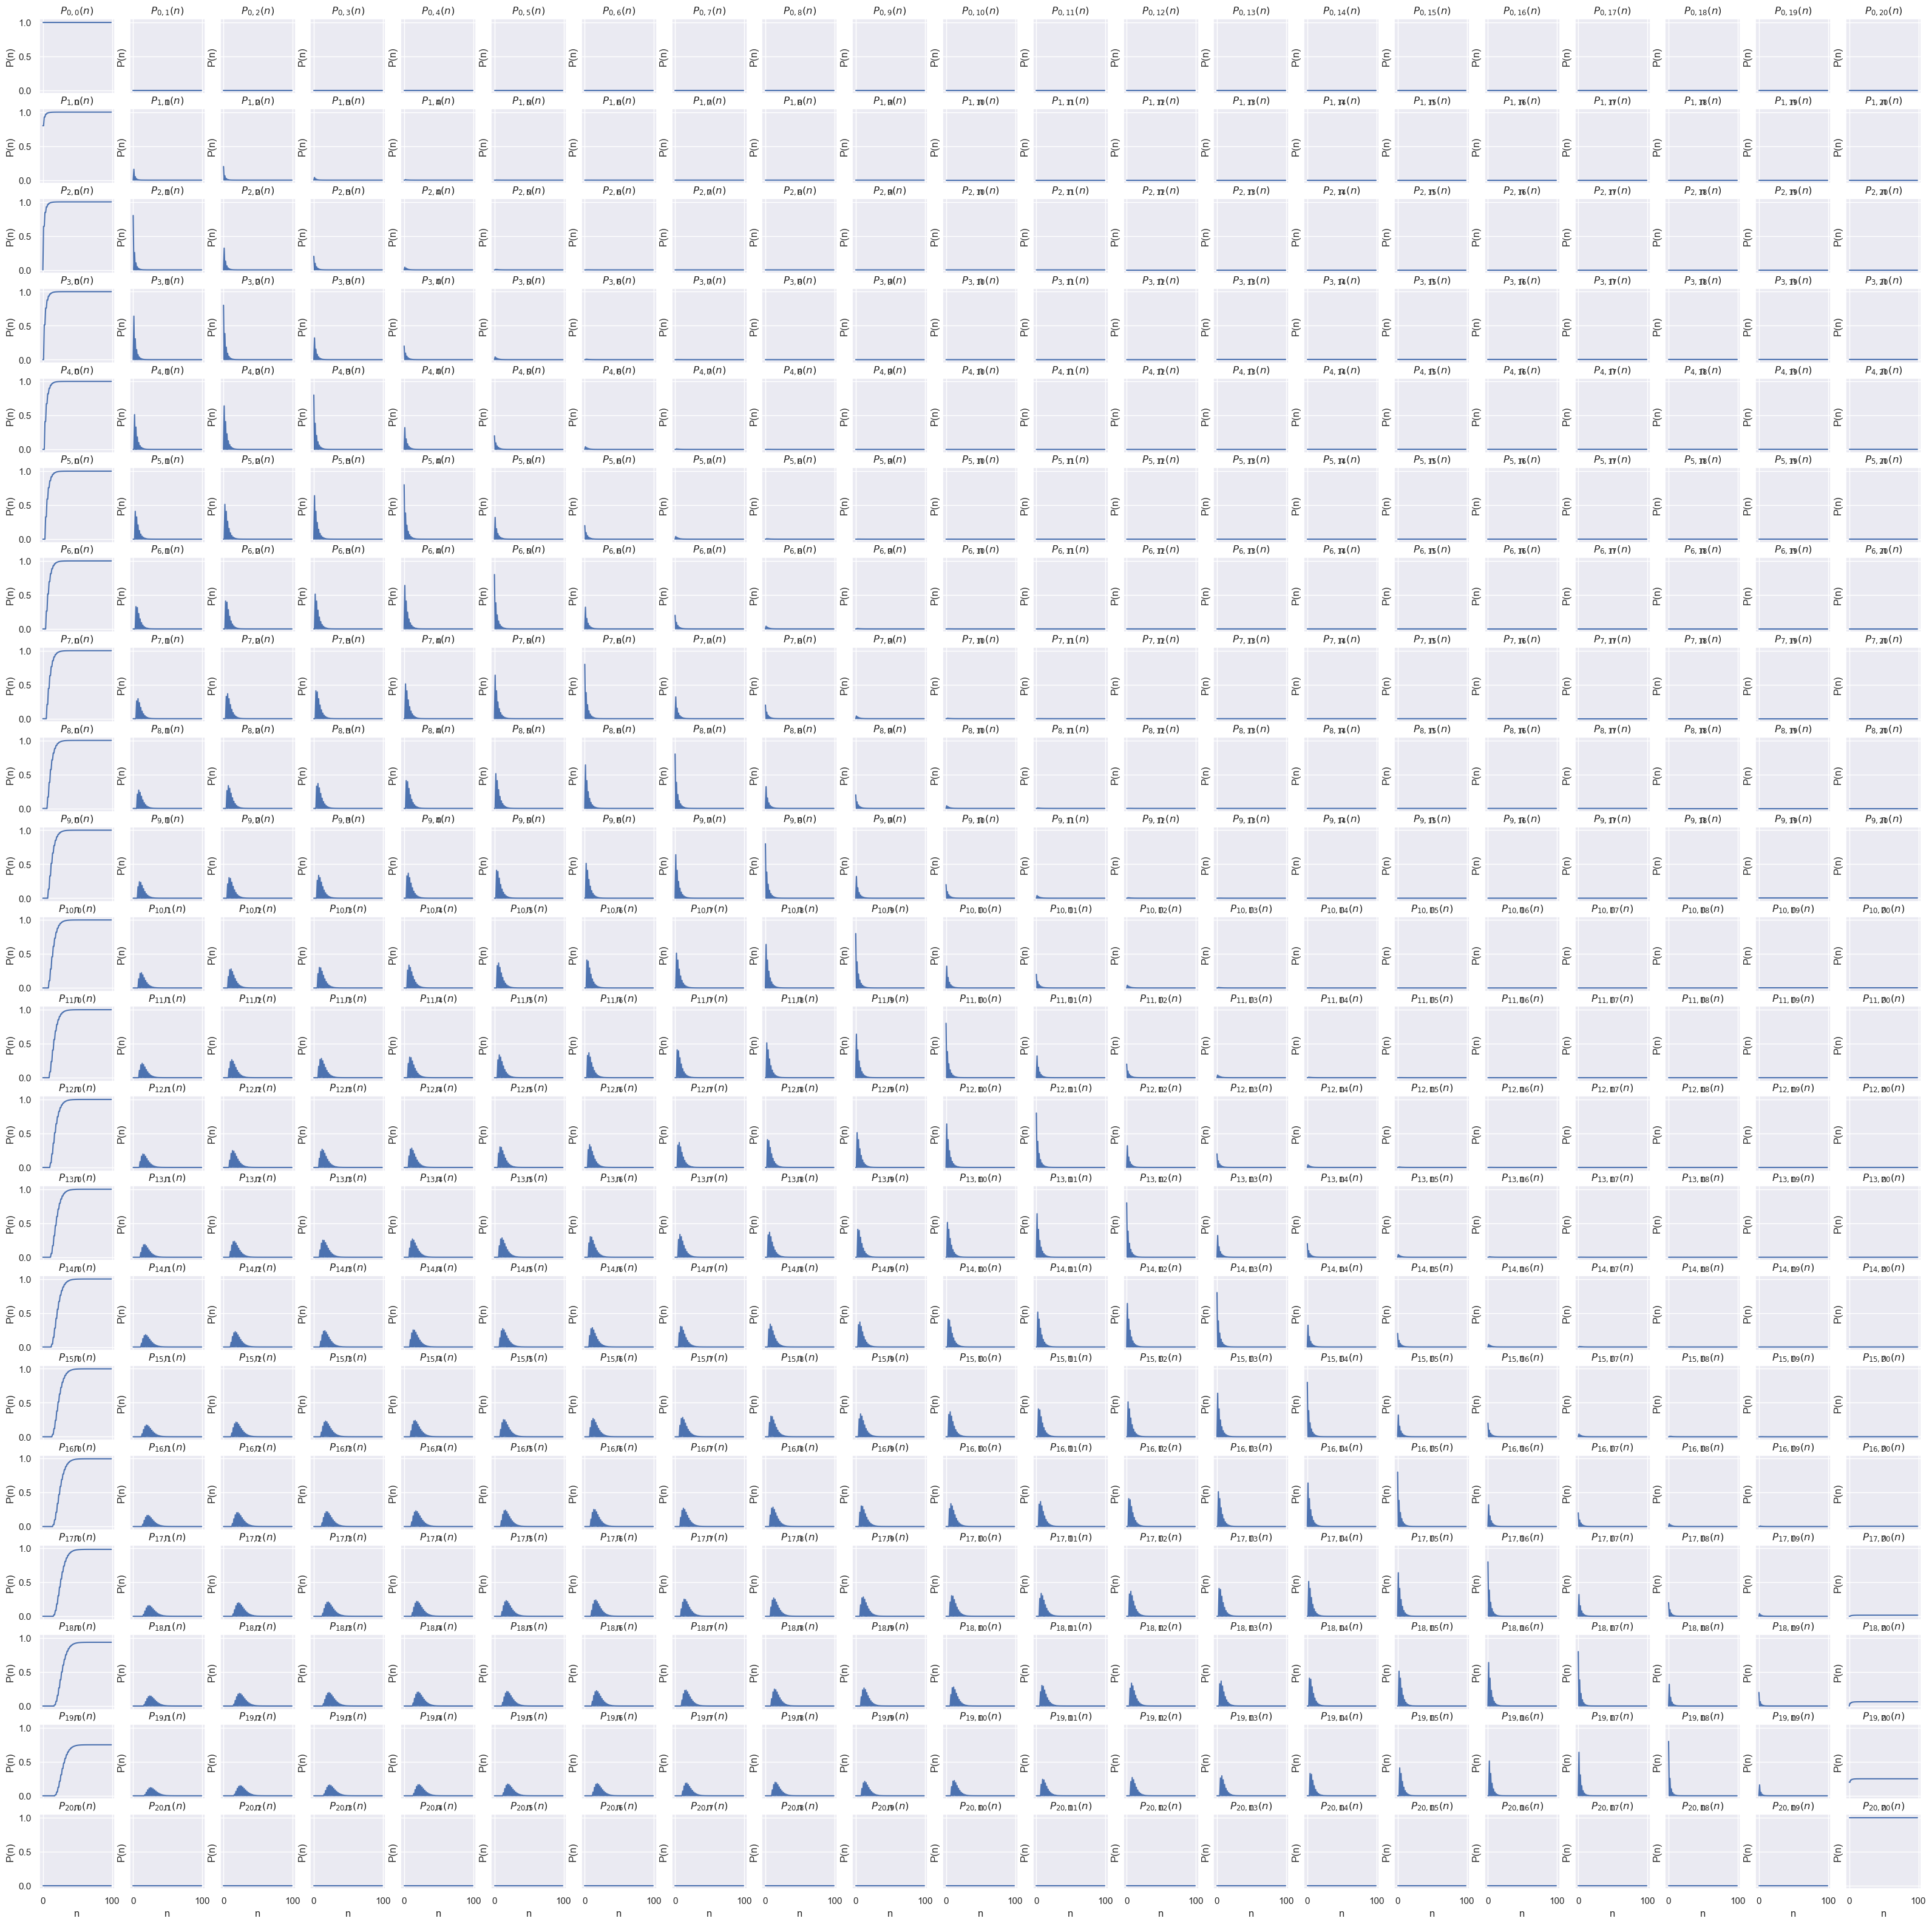

In [25]:
fig, ax = plt.subplots(21, 21, figsize = (40, 40), sharex = True, sharey = True)
for i in range(21):
    for j in range(21):
        ax[i, j].plot(P_5[:, i, j])
        ax[i, j].set_title(f"$P_{{{i}, {j}}}(n)$")
        ax[i, j].set_xlabel("n")
        ax[i, j].set_ylabel("P(n)")

## Part 3 - Left/Right (50/50 Chance)

### Question 1

#### Create a Transition Probability Matrix

In the matrix below, each element represents the probability of transitioning from state i (row value) to state j (column value). We know from the problem setup that if the robot is at either terminal of the path (0 or 20), the episode ends and the robot doesn't make any more moves. For every other space, the robot has a 50% chance of moving right, and a 50% chance of moving left.

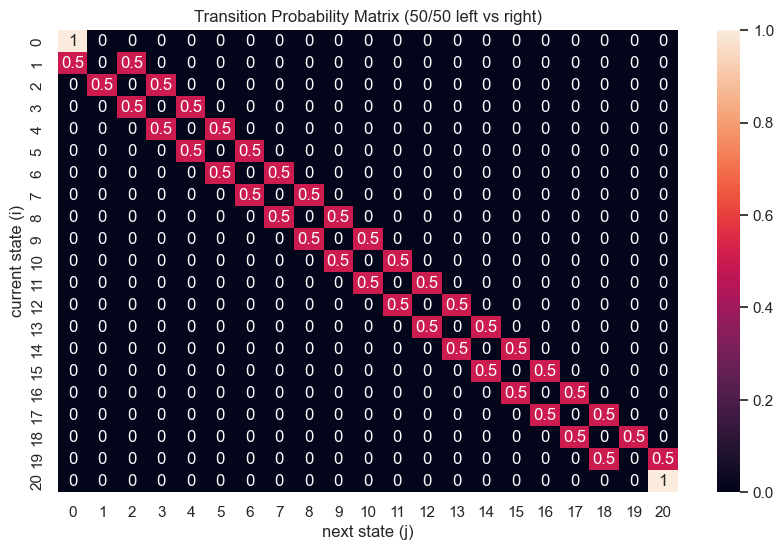

In [26]:
P = np.zeros((21, 21))
P = pd.DataFrame(P)

for s in range(21):
    if s == 0 or s == 20:
        P.iloc[s, s] = 1.0
    else:
        P.iloc[s, s+1] = 0.5 # 50% chance of moving right
        P.iloc[s, s-1] = 0.5 # 50% chance of moving left
        
sns.set(rc = {"figure.figsize":(10, 6)})
mtx = sns.heatmap(P, annot = True)
mtx.set(xlabel = 'next state (j)',
        ylabel = 'current state (i)',
        title = 'Transition Probability Matrix (50/50 left vs right)');

### Question 2

Group all states into classes. Report the classes and the total number of classes.

In [27]:
print('Classes are as follows:')
print('\n')

absorb_state_1 = {0}
print(absorb_state_1) # 0 is an absorbing state and thus forms its own class
print('\n')

transient_class = {num for num in range(1, 20)}
print(transient_class)
print('\n')

absorb_state_2 = {20}
print(absorb_state_2) # 20 is an absorbing state and thus forms its own class
print('\n')

# combine and count the classes
class_list = []
class_list.append(absorb_state_1)
class_list.append(transient_class)
class_list.append(absorb_state_2)

print('\n')
print('There are', len(class_list), 'classes')

Classes are as follows:


{0}


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


{20}




There are 3 classes


The two terminal states (0 and 20) form their own classes. State 0 can be accessed by state 1, but not the other way around, so these states do not communicate and therefore state 0 forms its own class. The same logic can be applied to states 19 and 20 - 20 can be accessed by 19, but not the other way around, so state 20 forms its own class.

Other than 0 and 20, all of the other states form a transient class, as the robot has a nonzero probability of passing through each of these states but it will never stay in any of these states forever. This logic forms the classes listed above.

### Question 3

#### Write the policy - always try to move right

In [28]:
def policy(observation):
    action = 1
    return action

#### Initiate values and create empty lists. Construct a loop to go through up to 100 steps (unless absorbing state is reached first). Plot the steps.

p = 0.5, meaning that the robot's action will result in moving right 50% of the time, and left the other 50% of the time

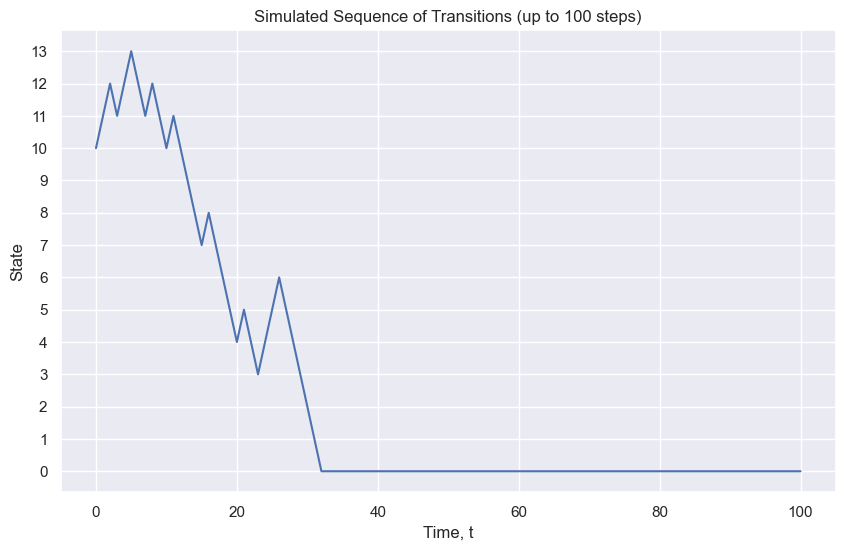

In [29]:
t=0
tMAX = 100 # representing a simulation of up to 100 steps
done = False
observations = [0] * 101
observation = 10
observations[0] = observation
rewards = []
actions = []
t_log = list(range(101))

env = Segment(numActions=2,startObservation=10,p=0.5,terminal=10,done=False)
while t <tMAX and done==False:
    action = policy(observation=observation)
    observation_next,reward,done = env.step(action=action)
    observations[t+1] = observation_next
    rewards.append(reward)
    actions.append(action)
    observation = observation_next
    t+=1

# after the episode is over, stay at the terminal state for the rest of the 100 steps (see loop below)
for i in range(t+1, 101): 
    observations[i] = observation

plt.plot(t_log, observations) # only plot the first 100 steps
plt.yticks(np.arange(np.min(observations), np.max(observations)+1, 1))
plt.xlabel('Time, t')
plt.ylabel('State')
plt.title('Simulated Sequence of Transitions (up to 100 steps)')
plt.show();

#### Report the likelihood of the first 100 steps.

The code below will compute the state probabilities for steps 1 through 100. We can use the method that we learned in class below:

$$
p(n) = p(0)\cdot P(n)p(n) = p\cdot P(n)
$$

In [30]:
Pmat = np.array(P, dtype = float)
p0 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.5, 0., 0.5, 0., 0., 0., 0., 0., 0., 0., 0., 0.]

T = 100 # we want to look at the first 100 steps
n = 21 # representing the 21 states in our environment
P_new = np.zeros((T,n,n),dtype=np.float64)
p1= np.zeros((T,1,n),dtype=np.float64)

P_new[0] = Pmat
p1[0] = p0

for t in range(1,T):
    # method 1: p(n) = p(0) * P(n)
    p1[t] = np.matmul(p0,P_new[t-1])
    # update n-step transition matrix
    P_new[t] = np.matmul(P_new[t-1],Pmat)

new_array = p1.reshape((100, 21))
df = pd.DataFrame(new_array)
df.index = list(range(1, 101))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print('Likelihood of each transition at each step (assuming we start at state 10):')
df

Likelihood of each transition at each step (assuming we start at state 10):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.500000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.375000,0.000000,0.375000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.250000,0.000000,0.375000,0.000000,0.250000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.156250,0.000000,0.312500,0.000000,0.312500,0.000000,0.156250,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.093750,0.000000,0.234375,0.000000,0.312500,0.000000,0.234375,0.000000,0.093750,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.007812,0.000000,0.054688,0.000000,0.164062,0.000000,0.273438,0.000000,0.273438,0.000000,0.164062,0.000000,0.054688,0.000000,0.007812,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.003906,0.000000,0.031250,0.000000,0.109375,0.000000,0.218750,0.000000,0.273438,0.000000,0.218750,0.000000,0.109375,0.000000,0.031250,0.000000,0.003906,0.000000,0.000000
9,0.000000,0.001953,0.000000,0.017578,0.000000,0.070312,0.000000,0.164062,0.000000,0.246094,0.000000,0.246094,0.000000,0.164062,0.000000,0.070312,0.000000,0.017578,0.000000,0.001953,0.000000
10,0.000977,0.000000,0.009766,0.000000,0.043945,0.000000,0.117188,0.000000,0.205078,0.000000,0.246094,0.000000,0.205078,0.000000,0.117188,0.000000,0.043945,0.000000,0.009766,0.000000,0.000977


#### We can also look at a heatmap to visualize the transition likelihoods at a higher level

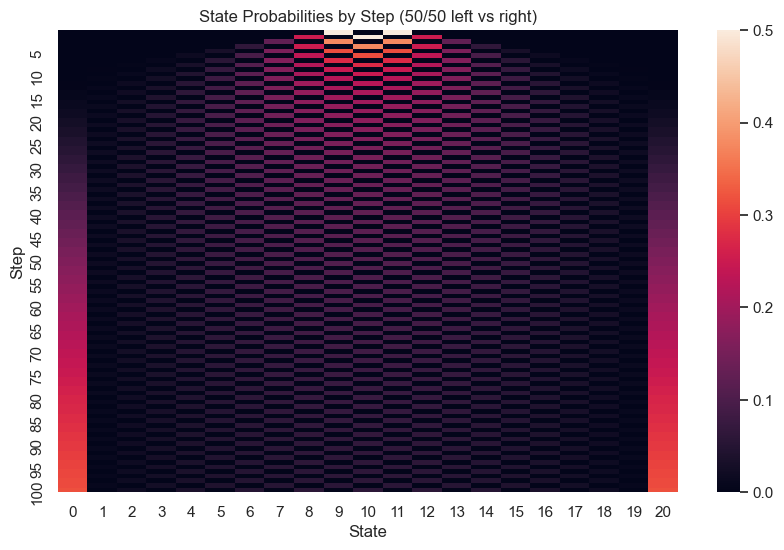

In [31]:
mtx = sns.heatmap(df, annot = False)
mtx.set(xlabel = 'State',
        ylabel = 'Step',
        yticks = list(range(5, 105, 5)),
        yticklabels = list(range(5, 105, 5)),
        title = 'State Probabilities by Step (50/50 left vs right)',);

#### Report the likelihood of each transition from our simulation (using the likelihood of the first 100 steps as computed above)

This code block creates a new dataframe for the steps and observations from our simulation. It then uses the table above to look up the likelihood of each transition at its associated time/step.

In [32]:
likelihood_df_sim = pd.DataFrame({'t': t_log[1:], 'observation': observations[1:]}) # we can leave out the first observation since it will always be 10
likelihood_df_sim['likelihood'] = ''

for index, row in likelihood_df_sim.iterrows():
    # go look up the relevant values from the likelihood table that we created above (df)
    likelihood_df_sim.loc[index, 'likelihood'] = df.iloc[likelihood_df_sim.loc[index, 't']-1, likelihood_df_sim.loc[index, 'observation']]

likelihood_df_sim

,t,observation,likelihood
0,1,11,0.5
1,2,12,0.25
2,3,11,0.375
3,4,12,0.25
4,5,13,0.15625
5,6,12,0.234375
6,7,11,0.273438
7,8,12,0.21875
8,9,11,0.246094
9,10,10,0.246094


#### Is this Markov chain stationary?

This Markov chain is stationary. We can tell this by looking at the n-step ahead probability plots below. For each possible transi remains constant as the number of transitions increases. In other words, the distribution of states does not depend on the initial state and only depends on the transition probabilities.

#### Is the Markov chain time homogenous?

This Markov chain is time homogenous. We can tell this because we know that the transition probability matrix is fixed, and doesn't change over time.

### Question 4

Compare the estimated (simulated) transition probabilities with the actual transition probabilities.

In [33]:
likelihood_df_actual = pd.DataFrame({'t': t_log[1:], 'observation': observations[1:]}) # we can leave out the first observation since it will always be 10
likelihood_df_actual['likelihood'] = ''
obs_prev = 10 # initialize as 10 since that's where the robot starts
likelihood_prev = 1.0 # initialize as 1.0 since the first likelihood will just be the probability of the first step itself

for index, row in likelihood_df_actual.iterrows():
    # go look up the relevant values from the actual transition probability matrix (P)
    likelihood_df_actual.loc[index, 'likelihood'] = P.iloc[obs_prev, row.observation] * likelihood_prev
    likelihood_prev = likelihood_df_actual.loc[index, 'likelihood']
    obs_prev = row.observation

#### Create a new combined table to compare the simulated and actual probabilities

In [34]:
likelihood_df_combined = pd.DataFrame({'t': t_log[1:],
                                       'observation': observations[1:],
                                       'likelihood_sim': likelihood_df_sim.likelihood,
                                       'likelihood_actual': likelihood_df_actual.likelihood})
likelihood_df_combined

,t,observation,likelihood_sim,likelihood_actual
0,1,11,0.5,0.5
1,2,12,0.25,0.25
2,3,11,0.375,0.125
3,4,12,0.25,0.0625
4,5,13,0.15625,0.03125
5,6,12,0.234375,0.015625
6,7,11,0.273438,0.007812
7,8,12,0.21875,0.003906
8,9,11,0.246094,0.001953
9,10,10,0.246094,0.000977


### Question 5

Plot the n-step ahead probabilities for each transition for the first 100 steps.

In [35]:
T = 100 # we want to look at the first 100 steps
n = 21 # represents the 21 states in our environment
P_5 = np.zeros((T,n,n),dtype=np.float64)
Pmat = np.array(P, dtype=float) # P = the original transition probability matrix for this policy

P_5[0] = Pmat

for t in range(1,T):
    P_5[t] = np.matmul(P_5[t-1],Pmat)

P_5.shape

(100, 21, 21)

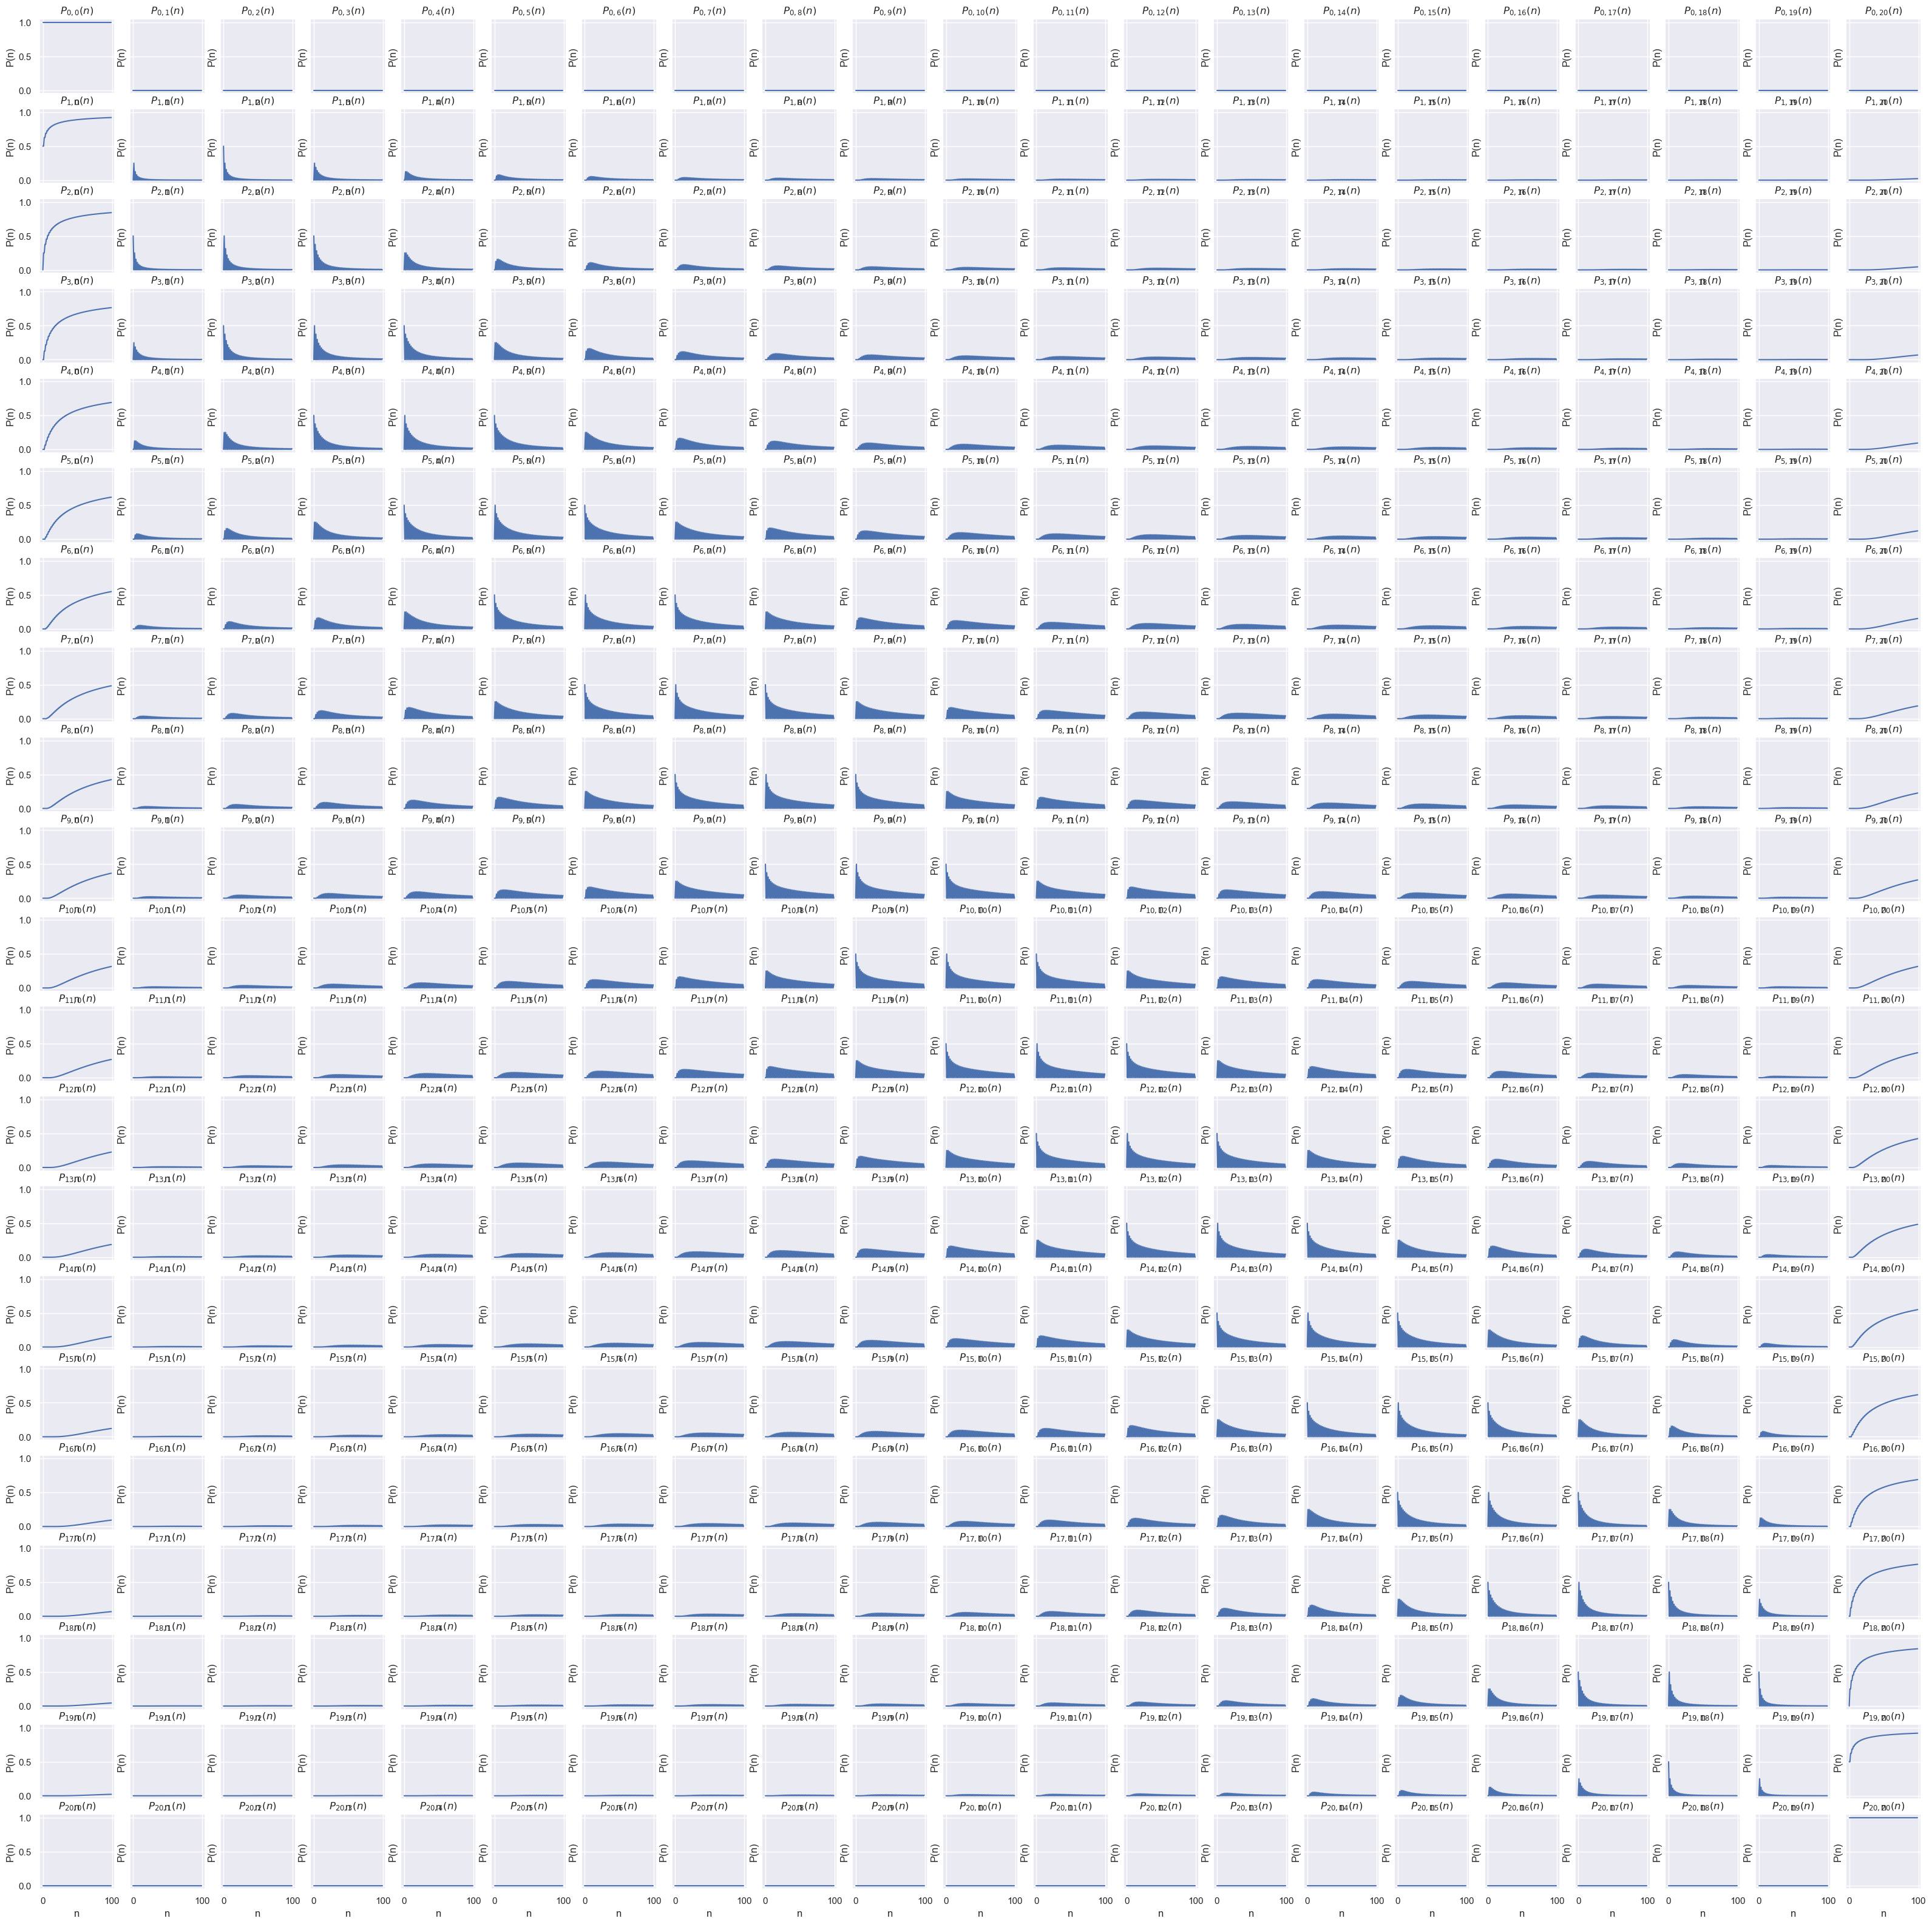

In [36]:
fig, ax = plt.subplots(21, 21, figsize = (40, 40), sharex = True, sharey = True)
for i in range(21):
    for j in range(21):
        ax[i, j].plot(P_5[:, i, j])
        ax[i, j].set_title(f"$P_{{{i}, {j}}}(n)$")
        ax[i, j].set_xlabel("n")
        ax[i, j].set_ylabel("P(n)")